### columns info
 - ACADEMIC_STAT_CODE : 중도탈락 여부
 - ADMISSION : 입학 전형
 - AGE : 나이
 - ATTENDANCE : 출석률
 - DOUBLE_MAJOR : 복수전공 여부
 - GRADE : 평균학점
 - INCOME_QUINTILE: 소득분위(5분위)
 - OCCP_GRP_1 : 학과 계열
 - PREPARE_ATTENDANCE : 동일 나이 대비 출석률
 - PREPARE_GRADE : 동일 나이 대비 평균학점
 - PREPARE_join_1years_ago	PREPARE_join_2years_ago	PREPARE_join_3years_ago	PREPARE_join_4years_ago	PREPARE_join_this_year 
   : 동일나이 대비 년도별 교내 프로그램 참가 횟수
 - STUDENT_ID : 학생 고유 번호
 - TOTAL_JOIN : 교내프로그램 총 참가 횟수
 - TOTAL_OFF : 총 휴학 횟수
 - UNI_DIST : 거주지와 대학간의 거리
 - join_1years_ago join_2years_ago join_3years_ago join_4years_ago join_this_year
   : 년도별 교내프로그램 참가 횟수
 - off_1years_ago	off_2years_ago	off_3years_ago	off_4years_ago	off_this_year
   : 년도별 휴학 여부

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def p_100(a, b):
    print( round( (a/(a+b))*100,2), "%" )

In [3]:
x_test = pd.read_csv('./drop_out/save_x_test.csv',encoding='utf-8').rename(columns= {'Unnamed: 0': 'index'}).set_index('index',drop=True)
y_test = pd.read_csv('./drop_out/save_y_test.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
real_feature = pd.read_csv('./drop_out/save_real_feature.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
data_label = pd.read_csv('./drop_out/save_data_label.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
data_label_2 = pd.read_csv('./drop_out/save_data_label_2.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)

## 최종 학습 데이터 확인하기

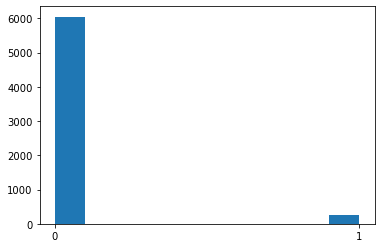

ACADEMIC_STAT_CODE
0                     6047
1                      263
dtype: int64
4.17 %
None


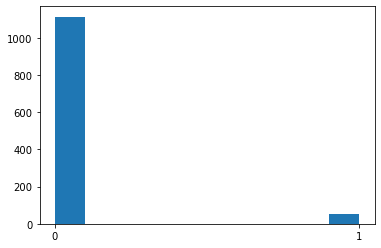

ACADEMIC_STAT_CODE
0                     1114
1                       51
dtype: int64
4.38 %
None


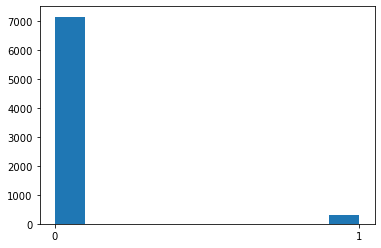

ACADEMIC_STAT_CODE
0                     7161
1                      314
dtype: int64
4.2 %
None


In [4]:
data_label = data_label.replace('탈락',1)
data_label = data_label.replace('유지',0)

data_label_2 = data_label_2.replace('탈락',1)
data_label_2 = data_label_2.replace('유지',0)

y_test = y_test.replace('탈락',1)
y_test = y_test.replace('유지',0)

plt.hist(data_label)
plt.xticks([0,1])
plt.show()

print(data_label.value_counts())
print(p_100(data_label.value_counts()[1],data_label.value_counts()[0]))

plt.hist(data_label_2)
plt.xticks([0,1])
plt.show()

print(data_label_2.value_counts())
print(p_100(data_label_2.value_counts()[1],data_label_2.value_counts()[0]))


real_label = pd.concat([data_label,data_label_2],axis=0)

plt.hist(real_label)
plt.xticks([0,1])
plt.show()

print(real_label.value_counts())
print(p_100(real_label.value_counts()[1],real_label.value_counts()[0]))

## SMOTE
 - 가장 성능을 좋게 하는 BorderlineSMOTE를 사용

In [5]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# x_train_over,y_train_over = smote.fit_resample(real_feature,real_label)

# print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', real_feature.shape, real_label.shape)
# print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)

# print('SMOTE 적용 후 레이블 값 분포: \n', y_train_over.value_counts())

In [6]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state=42)
x_train_over,y_train_over = bsmote.fit_resample(real_feature,real_label)

print('BorderlineSMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', real_feature.shape, real_label.shape)
print('BorderlineSMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('BorderlineSMOTE 적용 후 레이블 값 분포: \n', y_train_over.value_counts())

BorderlineSMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (7475, 38) (7475, 1)
BorderlineSMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (14322, 38) (14322, 1)
BorderlineSMOTE 적용 후 레이블 값 분포: 
 ACADEMIC_STAT_CODE
0                     7161
1                     7161
dtype: int64


In [7]:
# from imblearn.over_sampling import ADASYN

# ads = ADASYN(random_state=42)
# x_train_over,y_train_over = ads.fit_resample(real_feature,real_label)

# print('ADASYN 적용 전 학습용 피처/레이블 데이터 세트: ', real_feature.shape, real_label.shape)
# print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
# print('ADASYN 적용 후 레이블 값 분포: \n', y_train_over.value_counts())

## 모델 생성
 - Ensemble : 여러 모델이 동일한 문제를 해결하고 더 나은 결과를 얻도록 훈련시키는 기계 학습 패러다임
   - Voting : 여러 모델을 같은 데이터에 대해 학습하고 모델을 조합해서 단일 모델보다 더 나은 결과를 얻도록 하는 방식
   - Bagging : 단일 모델에서 샘플을 여러번 뽑아(Bootstrap), 여러개의 분류기를 만들어 보팅으로 최종 결정을 하는 방식
   - Boosting : 여러 모델이 순차적으로 학습하며 오분류된 객체에 가중치를 조절해서 예측하는 방식
   - Stacking : 여러 모델을 결합해 예측결과를 도출하지만, 개별 모델로 예측한 데이터를 기반으로 다시 예측을 진행하는 방식

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import time

#### 튜닝 전 모델 생성
 - 11개의 모델 중 성능이 가장 좋은 모델 3개를 골라 voting

In [9]:
start = time.time() 
x_train_over.copy()
y_train_over.copy()
x_test.copy()
y_test.copy()

dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)
xtree_clf = ExtraTreesClassifier(random_state=42)
bag_clf = BaggingClassifier(random_state=42)
gdb_clf = GradientBoostingClassifier(random_state=42)
log_clf = LogisticRegression(random_state=42)
#rid_clf = RidgeClassifier(random_state=42)
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)
lgb_clf = LGBMClassifier(random_state=42)

clf_list = [dt_clf, rf_clf, ada_clf, xtree_clf, bag_clf, gdb_clf, log_clf, svm_clf, knn_clf, xgb_clf, lgb_clf]
clf_top3 = [] 

for clf in clf_list:
    clf.fit(x_train_over, y_train_over)
    y_pred = clf.predict(x_test)
    cf = confusion_matrix(y_test, y_pred, labels=[1, 0])
    print(clf.__class__.__name__)
    print("confusion_matrix : ")
    print(cf)
    print("accuracy_score : {:.2f}".format(accuracy_score(y_test,y_pred)*100))
    print("recall_score : {:.2f}".format(recall_score(y_test,y_pred,labels=[1, 0])*100))
    print("precision_score : {:.2f}".format(precision_score(y_test,y_pred,labels=[1, 0])*100))
    print("f1_score : {:.2f}".format(f1_score(y_test,y_pred,labels=[1, 0])*100))
    print()         
    clf_top3.append([clf, recall_score(y_test,y_pred,labels=[1, 0])*100])

clf_top3.sort(key=lambda x: (-x[1]))

top3_estimators = [('top1', clf_top3[0][0]),
                   ('top2', clf_top3[1][0]),
                   ('top3', clf_top3[2][0])]

voting_clf = VotingClassifier(estimators=top3_estimators, voting='soft')

voting_clf.fit(x_train_over, y_train_over)
y_pred = voting_clf.predict(x_test)
cf = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(voting_clf.__class__.__name__, end='')
print(" : ",clf_top3[0][0], clf_top3[1][0], clf_top3[2][0])
print("confusion_matrix : ")
print(cf)
print("recall_score : {:.2f}".format(recall_score(y_test,y_pred,labels=[1, 0])*100))
print("precision_score : {:.2f}".format(precision_score(y_test,y_pred,labels=[1, 0])*100))
print("f1_score : {:.2f}".format(f1_score(y_test,y_pred,labels=[1, 0])*100))
print()  
    
end = time.time()     
print(f"{end - start:.5f} sec")      

DecisionTreeClassifier
confusion_matrix : 
[[  19  113]
 [ 155 2804]]
accuracy_score : 91.33
recall_score : 14.39
precision_score : 10.92
f1_score : 12.42

RandomForestClassifier
confusion_matrix : 
[[   4  128]
 [  25 2934]]
accuracy_score : 95.05
recall_score : 3.03
precision_score : 13.79
f1_score : 4.97

AdaBoostClassifier
confusion_matrix : 
[[  32  100]
 [ 187 2772]]
accuracy_score : 90.71
recall_score : 24.24
precision_score : 14.61
f1_score : 18.23

ExtraTreesClassifier
confusion_matrix : 
[[   7  125]
 [  29 2930]]
accuracy_score : 95.02
recall_score : 5.30
precision_score : 19.44
f1_score : 8.33

BaggingClassifier
confusion_matrix : 
[[  10  122]
 [  63 2896]]
accuracy_score : 94.01
recall_score : 7.58
precision_score : 13.70
f1_score : 9.76

GradientBoostingClassifier
confusion_matrix : 
[[  14  118]
 [  48 2911]]
accuracy_score : 94.63
recall_score : 10.61
precision_score : 22.58
f1_score : 14.43

LogisticRegression
confusion_matrix : 
[[  65   67]
 [ 613 2346]]
accuracy_sc

#### 모델 튜닝
 - 튜닝을 통해 가장 성능이 좋은 모델 3개를 voting

In [10]:
start = time.time() 

dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)
xtree_clf = ExtraTreesClassifier(random_state=42)
bag_clf = BaggingClassifier(random_state=42)
gdb_clf = GradientBoostingClassifier(random_state=42)
log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)
lgb_clf = LGBMClassifier(random_state=42)

vote_list = [('dt',dt_clf),
            ('rf',rf_clf),
            ('ada',ada_clf),
            ('xtree',xtree_clf),
            ('bag',bag_clf),
            ('gdb',gdb_clf),
            ('log',log_clf),
            ('svm',svm_clf),
            ('knn',knn_clf),
            ('xgb',xgb_clf),
            ('lgb',lgb_clf)]

grid_n_estimator = [10, 40, 70]
grid_ratio = [0.1, 0.5, 1]
grid_learn = [0.1, 0.5, 1]
grid_max_depth = [3, 6, 9, 12, 15, None]
grid_min_samples = [2, 4, 6]
grid_bool = [True, False]
grid_seed = [42]

grid_param = [
             [{
            #DecisionTreeClassifier
            'min_samples_split': grid_min_samples, #default=10
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],
             [{
            #RandomForestClassifier
            'min_samples_split': grid_min_samples, #default=10
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],
            [{
            #AdaBoostClassifier
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            'random_state': grid_seed
            }],
            [{
            #ExtraTreesClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],
            [{
            #BaggingClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],
            [{
            #GradientBoostingClassifier 
            'n_estimators': grid_n_estimator,
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],
            [{
            #LogisticRegressionCV 
            'C': [0.01, 0.1, 1, 10],
            'fit_intercept': grid_bool, #default: True
            'penalty': ['l1','l2'],
            'random_state': grid_seed
             }],
            [{
            #SVC 
            'C': [1,3,5], #default=1.0
            'probability': [True],
            'kernel' : ['linear'],
            'random_state': grid_seed
             }],
            [{
            #KNeighborsClassifier 
            'n_neighbors': [4,5,6,7,8], #default: 5
            'p':[1,2]
            }],
            [{
            #XGBClassifier
            'max_depth': grid_max_depth, #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }],
            [{
            #LGBMClassifier - 
             'max_depth': grid_max_depth,
              'seed': grid_seed   
            }],
            ]

grid_top3 = []

for clf, param in zip(vote_list,grid_param):
    param_start = time.time() 

    grid_cv = GridSearchCV(estimator=clf[1], param_grid=param, scoring='recall', cv=3, verbose=1)
    grid_cv.fit(x_train_over, y_train_over)
    best_param = grid_cv.best_params_     
    clf[1].set_params(**best_param)
    y_pred = grid_cv.predict(x_test)

    param_end = time.time()
    run = param_end - param_start
    
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    cf = confusion_matrix(y_test, y_pred, labels=[1, 0])
    print("confusion_matrix : ")
    print(cf)
    print("recall_score : {:.2f}".format(recall_score(y_test,y_pred,labels=[1, 0])*100))
    print("precision_score : {:.2f}".format(precision_score(y_test,y_pred,labels=[1, 0])*100))
    print("f1_score : {:.2f}".format(f1_score(y_test,y_pred,labels=[1, 0])*100))
    print()
    grid_top3.append([clf, recall_score(y_test,y_pred,labels=[1, 0])*100])

grid_top3.sort(key=lambda x: (-x[1]))

grid_top3_estimators = [('top1', grid_top3[0][0][1]),
                       ('top2', grid_top3[1][0][1]),
                       ('top3', grid_top3[2][0][1])]

grid_voting_clf = VotingClassifier(estimators= grid_top3_estimators, voting='soft')

best_clf = grid_voting_clf.fit(x_train_over, y_train_over)

y_pred = best_clf.predict(x_test)
cf = confusion_matrix(y_test, y_pred, labels=[1, 0])
print("confusion_matrix : ")
print(cf)
print(best_clf.__class__.__name__, end='')
print(" : ",grid_top3[0][0][1], grid_top3[1][0][1], grid_top3[2][0][1])
print("accuracy_score : {:.2f}".format(accuracy_score(y_test,y_pred)*100))
print("recall_score : {:.2f}".format(recall_score(y_test,y_pred,labels=[1, 0])*100))
print("precision_score : {:.2f}".format(precision_score(y_test,y_pred,labels=[1, 0])*100))
print("f1_score : {:.2f}".format(f1_score(y_test,y_pred,labels=[1, 0])*100))
print()
    
end = time.time()     
print(f"{end - start:.5f} sec")    

Fitting 3 folds for each of 18 candidates, totalling 54 fits
The best parameter for DecisionTreeClassifier is {'max_depth': None, 'min_samples_split': 2, 'random_state': 42} with a runtime of 2.84 seconds.
confusion_matrix : 
[[  19  113]
 [ 155 2804]]
recall_score : 14.39
precision_score : 10.92
f1_score : 12.42

Fitting 3 folds for each of 18 candidates, totalling 54 fits
The best parameter for RandomForestClassifier is {'max_depth': None, 'min_samples_split': 2, 'random_state': 42} with a runtime of 37.75 seconds.
confusion_matrix : 
[[   4  128]
 [  25 2934]]
recall_score : 3.03
precision_score : 13.79
f1_score : 4.97

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best parameter for AdaBoostClassifier is {'learning_rate': 1, 'n_estimators': 70, 'random_state': 42} with a runtime of 12.97 seconds.
confusion_matrix : 
[[  19  113]
 [ 125 2834]]
recall_score : 14.39
precision_score : 13.19
f1_score : 13.77

Fitting 3 folds for each of 18 candidates, totalling 54 fits

## 모델 저장

In [11]:
import pickle
with open('./model/student_model.pickle','wb') as fw:
    pickle.dump(best_clf, fw)

## 모델 불러오기

In [12]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import datetime as dt
# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline

In [13]:
# x_test = pd.read_csv('./drop_out/save_x_test.csv',encoding='utf-8').rename(columns= {'Unnamed: 0': 'index'}).set_index('index',drop=True)
# y_test = pd.read_csv('./drop_out/save_y_test.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
# real_feature = pd.read_csv('./drop_out/save_real_feature.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
# data_label = pd.read_csv('./drop_out/save_data_label.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)
# data_label_2 = pd.read_csv('./drop_out/save_data_label_2.csv',encoding='utf-8').rename(columns = {'Unnamed: 0': 'index'}).set_index('index',drop=True)

# data_label = data_label.replace('탈락',1)
# data_label = data_label.replace('유지',0)

# data_label_2 = data_label_2.replace('탈락',1)
# data_label_2 = data_label_2.replace('유지',0)

# y_test = y_test.replace('탈락',1)
# y_test = y_test.replace('유지',0)

# real_label = pd.concat([data_label,data_label_2],axis=0)

# from imblearn.over_sampling import BorderlineSMOTE

# bsmote = BorderlineSMOTE(random_state=42)
# x_train_over,y_train_over = bsmote.fit_resample(real_feature,real_label)

# print('BorderlineSMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', real_feature.shape, real_label.shape)
# print('BorderlineSMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
# print('BorderlineSMOTE 적용 후 레이블 값 분포: \n', y_train_over.value_counts())

In [14]:
import pickle 
with open('./model/student_model.pickle','rb') as f:
    model = pickle.load(f)

## Explainable AI (XAI)

##### matplotlib 한글깨짐 해결

In [15]:
import matplotlib as mat
import matplotlib.font_manager as fonm

font_list = [font.name for font in fonm.fontManager.ttflist]
# for f in font_list:
#     print(f"{f}.ttf")

mat.rcParams['font.family'] = 'Hancom Gothic'

### LIME
 - voting에 사용된 각 모델별로 의사결정 요인을 시각화 한다.
 - 각 모델들의 의사결정 요인을 모두 합산하여 VotingClassifier모델의 의사결정 요인을 사각화한다. 

In [16]:
import lime
import lime.lime_tabular

#### voting에 이용된 모델들의 feature_importance 확인 및 각각의 의사결정의 주요 변수를 확인 

In [17]:
predict_fn_estimators_0 = lambda x: model.estimators_[0].predict_proba(x).astype(float)

predict_fn_estimators_1 = lambda x: model.estimators_[1].predict_proba(x).astype(float)

predict_fn_estimators_2 = lambda x: model.estimators_[2].predict_proba(x).astype(float)

feature_names = list(x_train_over.columns)
class_names = ['유지', '탈락']

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = x_train_over.values, feature_names=feature_names, training_labels=y_train_over.values ,\
                                                   class_names=class_names, discretize_continuous=True, random_state=42)

sample = len(x_test) - 1

exp_estimators_0 = explainer.explain_instance(data_row = x_test.values[sample], predict_fn = predict_fn_estimators_0, num_features=len(x_test), num_samples=10000, top_labels=2)

exp_estimators_1 = explainer.explain_instance(data_row = x_test.values[sample], predict_fn = predict_fn_estimators_1, num_features=len(x_test), num_samples=10000, top_labels=2)

exp_estimators_2 = explainer.explain_instance(data_row = x_test.values[sample], predict_fn = predict_fn_estimators_2, num_features=len(x_test), num_samples=10000, top_labels=2)

In [25]:
# exp_regressor.show_in_notebook(show_all=False)
exp_estimators_0.save_to_file('./feature_importance/{}.html'.format(model.estimators_[0]))

# exp_svc.show_in_notebook(show_all=False)
exp_estimators_1.save_to_file('./feature_importance/{}.html'.format(model.estimators_[1]))

# exp_kmeans.show_in_notebook(show_all=False)
exp_estimators_2.save_to_file('./feature_importance/{}.html'.format(model.estimators_[2]))

LogisticRegression(C=10, random_state=42)
SVC(C=1, kernel='linear', probability=True, random_state=42)
KNeighborsClassifier()


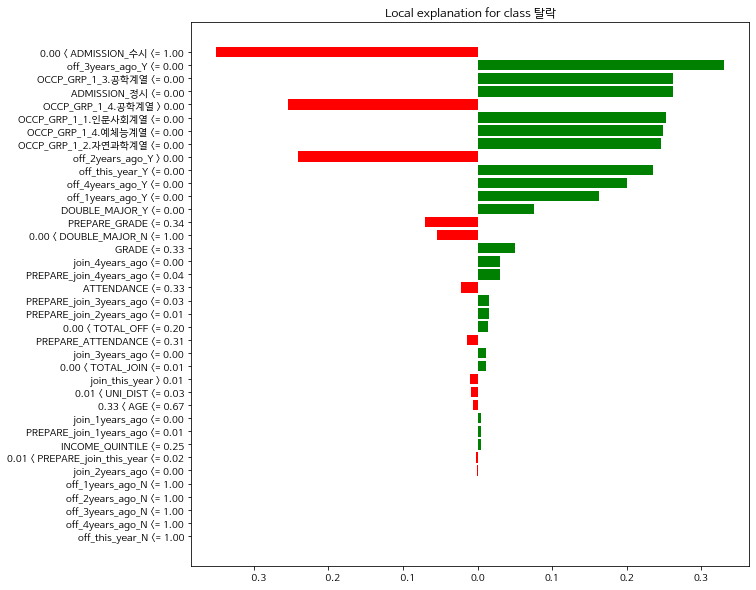

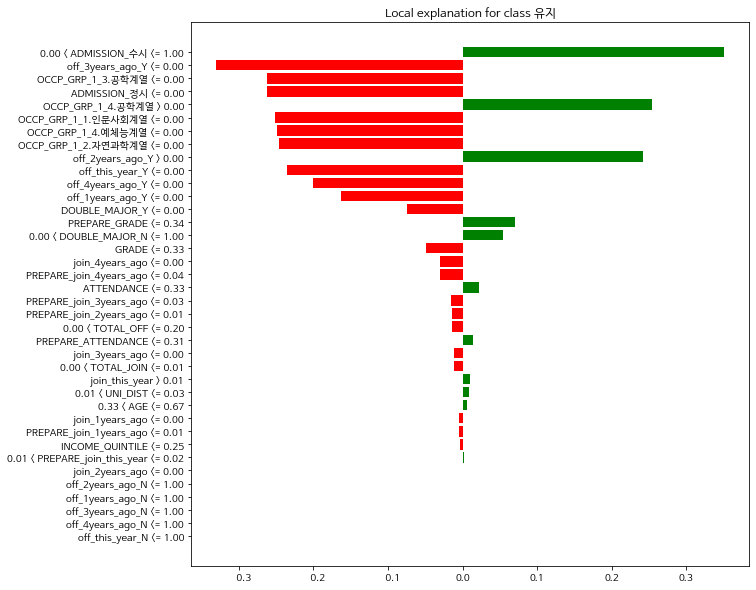

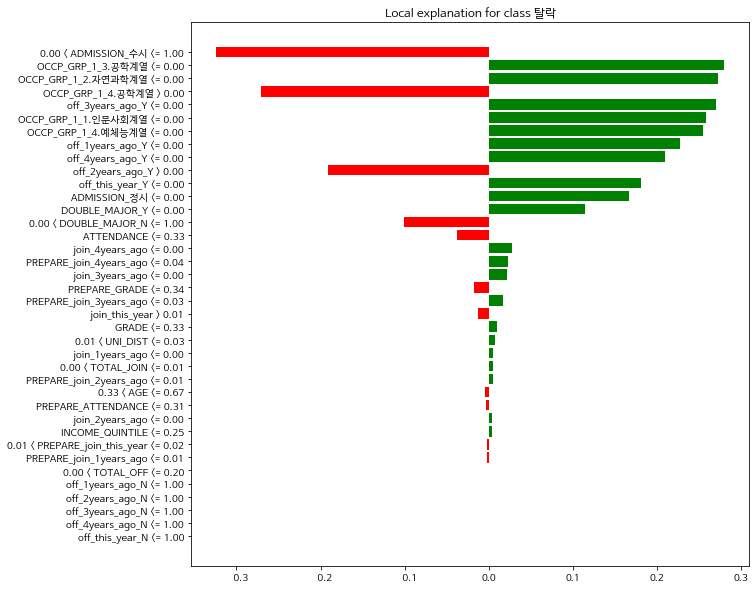

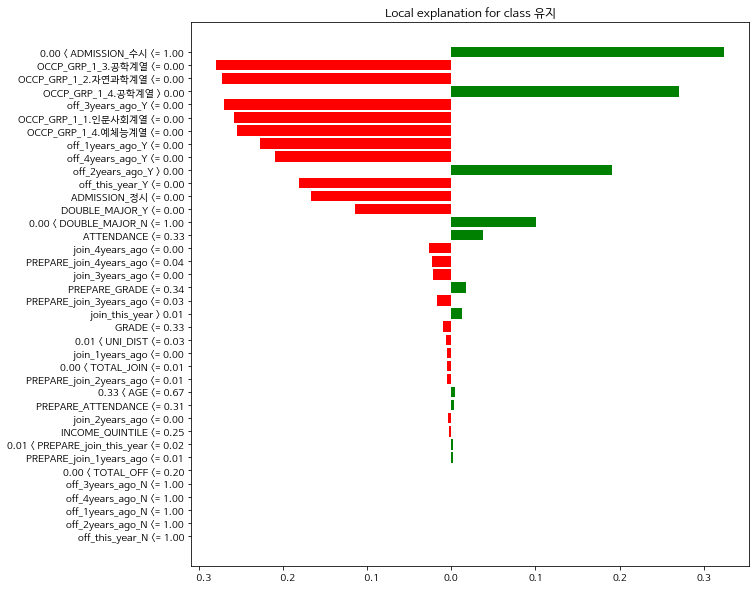

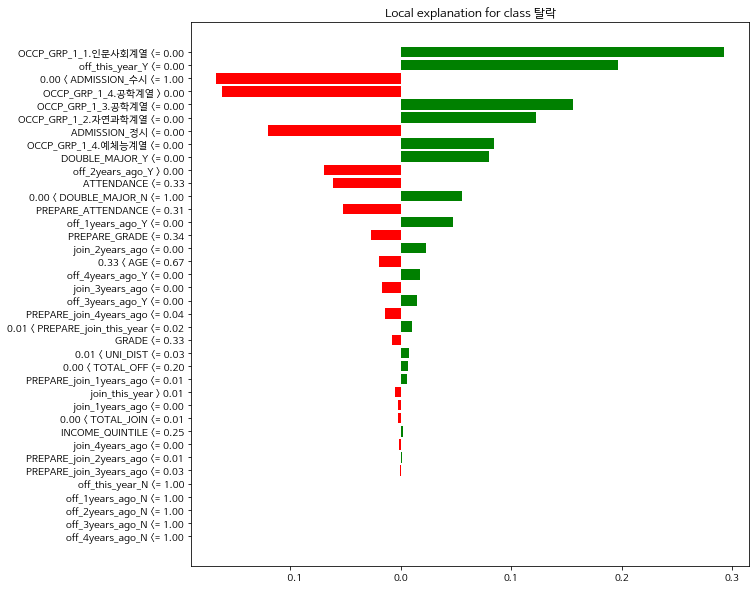

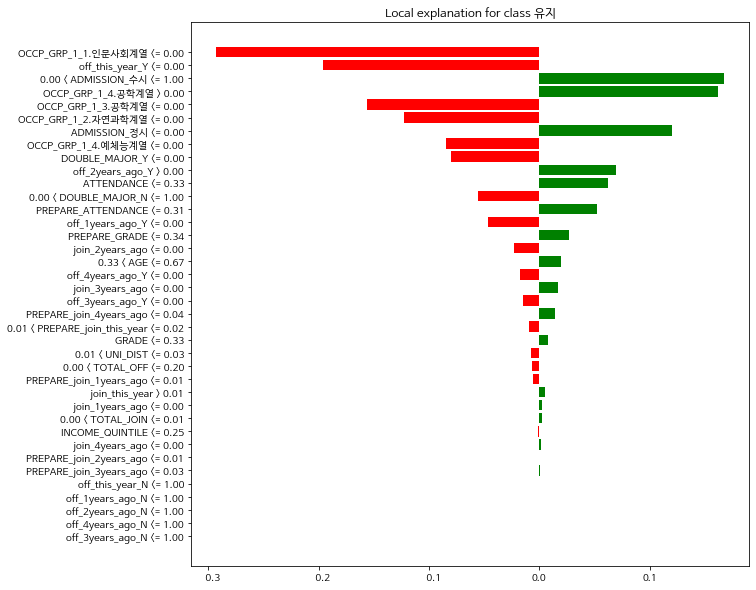

In [28]:
print(model.estimators_[0])
flg1 = exp_estimators_0.as_pyplot_figure(label=1)
flg1.set_size_inches(10, 10)
flg1.show()

flg2 = exp_estimators_0.as_pyplot_figure(label=0)
flg2.set_size_inches(10, 10)
flg2.show()

print(model.estimators_[1])
flg1 = exp_estimators_1.as_pyplot_figure(label=1)
flg1.set_size_inches(10, 10)
flg1.show()

flg2 = exp_estimators_1.as_pyplot_figure(label=0)
flg2.set_size_inches(10, 10)
flg2.show()

print(model.estimators_[2])
flg1 = exp_estimators_2.as_pyplot_figure(label=1)
flg1.set_size_inches(10, 10)
flg1.show()

flg2 = exp_estimators_2.as_pyplot_figure(label=0)
flg2.set_size_inches(10, 10)
flg2.show()

#### VotingClassifier모델의 feature_importance 확인 및 각각의 의사결정의 주요 변수를 확인

In [29]:
from operator import itemgetter
import operator

In [30]:
def sum_sentiment(x):
    init_dict = list(x)

    result = {}
    for d in init_dict:
        for k in d.keys():
            result[k] = result.get(k, 0) + d[k]
    return result

Text(0.5, 1.0, 'Feature importance using Voting Model')

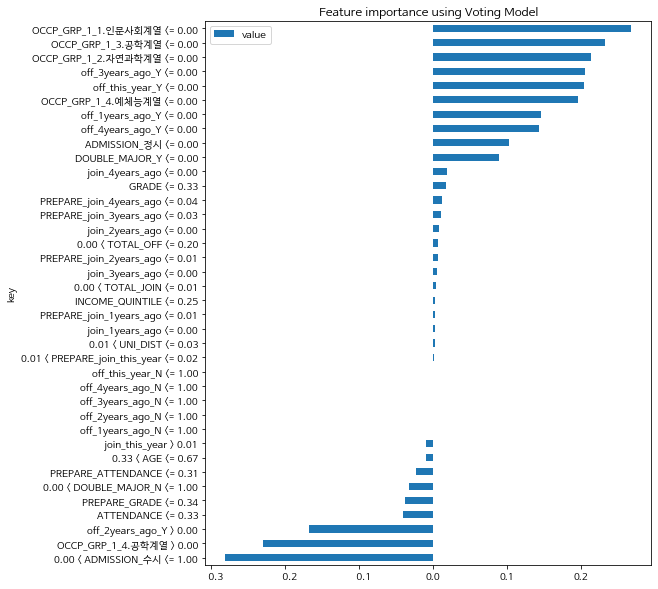

In [32]:
feature_importance1 = dict()
for i in range(38):
    feature_importance1[str(exp_estimators_0.as_list()[i][0])] = exp_estimators_0.as_list()[i][1]

feature_importance2 = dict()
for i in range(38):
    feature_importance2[str(exp_estimators_1.as_list()[i][0])] = exp_estimators_1.as_list()[i][1]

feature_importance3 = dict()
for i in range(38):
    feature_importance3[str(exp_estimators_2.as_list()[i][0])] = exp_estimators_2.as_list()[i][1]

df_dic = pd.DataFrame({'sentiment' : [feature_importance1]})
df_dic = df_dic.append({'sentiment' : feature_importance2}, ignore_index=True)
df_dic = df_dic.append({'sentiment' : feature_importance3}, ignore_index=True)

dic_sum = df_dic.agg({'sentiment' : lambda x : sum_sentiment(x)})

sorted_dic_sum = sorted(dic_sum.values[0].items(), key=operator.itemgetter(1))

voting_df = pd.DataFrame(data=sorted_dic_sum, columns=['key','value'])

voting_df['value'] = voting_df['value']/3

voting_df.set_index(keys='key',inplace=True)

voting_df.sort_values('value', ascending=True, inplace=True)

plt.rcParams['figure.figsize'] = (8.0, 10.0)
voting_df.plot(kind = "barh")
plt.title("Feature importance using Voting Model")